# Muhammad Eshan Javed

### Task 5 Perform 'Exploratory Data Analysis' on the dataset Sample Superstore

#### Objective: 
#### You are the business owner of a retail firm and want to see how the company is performing  in various categories and sub-categories. The main motive is to find the weak areas where as a company owner you can work to make more profit or we can say how we can find less profit making sector and work on it to generate more revenue.

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

import seaborn as sns

In [2]:
# Importing Dataset
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Checking if there is missing value in the dataset

In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There is no missing value in our data set

In [8]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
# Changing the Postal Code value from int64 to object 
df['Postal Code']= df['Postal Code'].astype('str')

In [10]:
# Checking the data types again
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
# Figuring out the duplicate value in the data set
df.duplicated().sum()

17

In [12]:
# Dropping the duplicate values from the dataset
df.drop_duplicates(inplace= True)

In [13]:
df.shape

(9977, 13)

#### Counting distinct values in each column 

In [14]:
df.nunique(axis=0, dropna= True)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
df.Country.unique()

array(['United States'], dtype=object)

In [16]:
# Dropping the Country column as it is the only country it's of no use
df.drop(['Country'], axis=1, inplace= True)

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9977,4,Standard Class,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9977,3,Consumer,5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9977,531,New York City,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9977,49,California,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9977,631,10035,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9977,4,West,3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9977,3,Office Supplies,6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9977,17,Binders,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9977,NaN,NaN,NaN,230.149,623.721,0.444,17.3,54.816,209.97,22638.5
Quantity,9977,NaN,NaN,NaN,3.79072,2.22666,1,2,3,5,14


#### Correlation between Columns

In [18]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


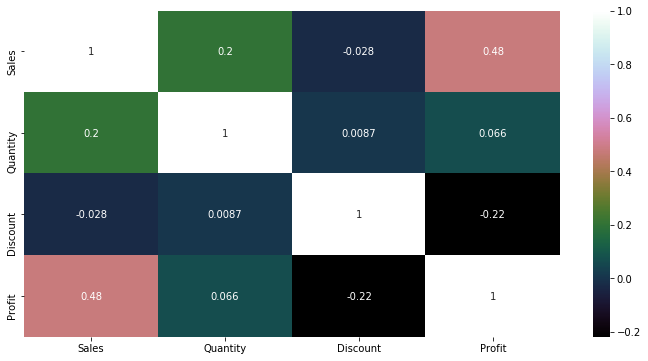

In [19]:
plt.figure(figsize= (12,6))
#sns.heatmap(df.corr(), annot= True )
heat_map= sns.heatmap(df.corr(), annot= True, cmap='cubehelix')
heat_map

#### Above correlation signifies, there is a weak correlation between variables

## Visualization of Data

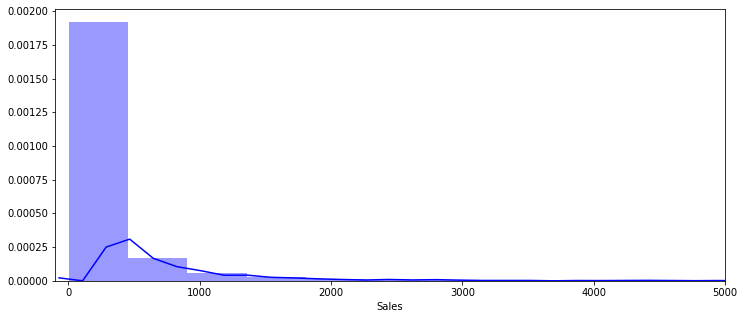

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(df['Sales'], color='b')
plt.xlim(-100,5000)
plt.show()

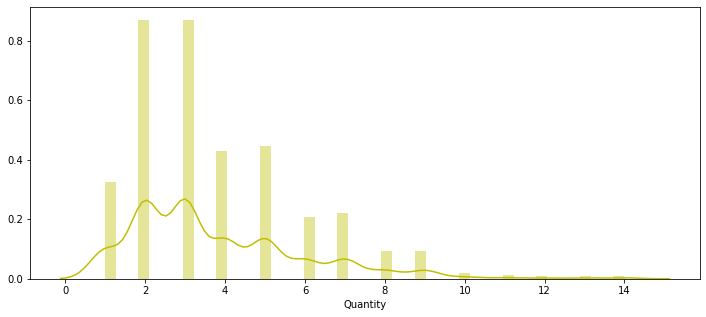

In [21]:
plt.figure(figsize=(12,5))
sns.distplot(df['Quantity'], color='y')
plt.show()

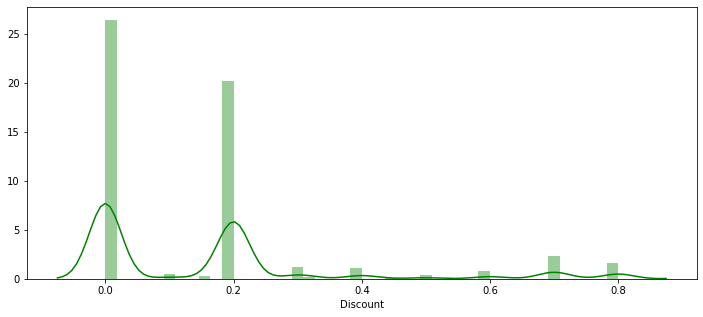

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(df['Discount'], color= 'g')
plt.show()

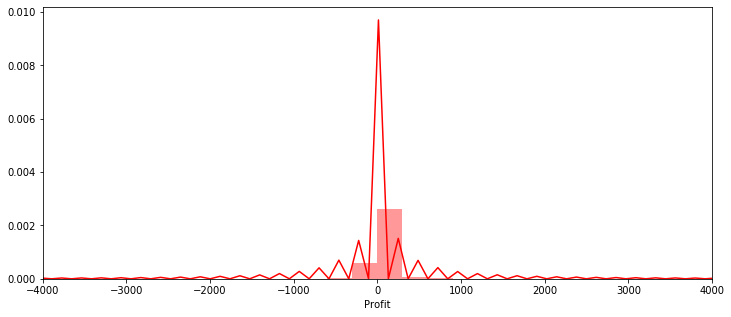

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(df['Profit'], color='r')
plt.xlim(-4000,4000)
plt.show()

In [24]:
df.Sales.describe()

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64

## Category Analysis

Text(0, 0.5, 'Sales')

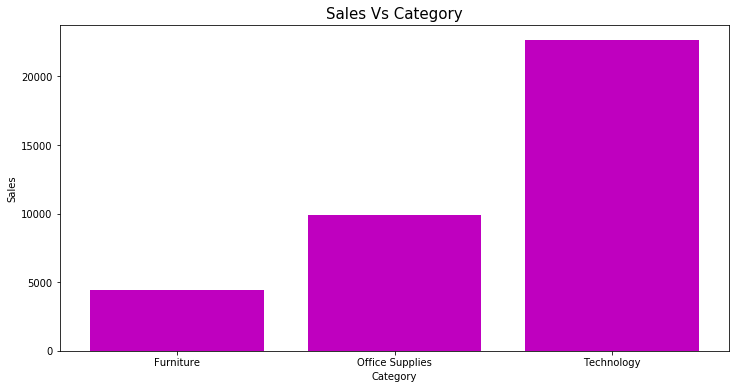

In [25]:
plt.figure(figsize=(12,6))
plt.bar('Category', 'Sales', color='m', data=df)
plt.title('Sales Vs Category', size=15)
plt.xlabel('Category', size=10)
plt.ylabel('Sales', size=10)

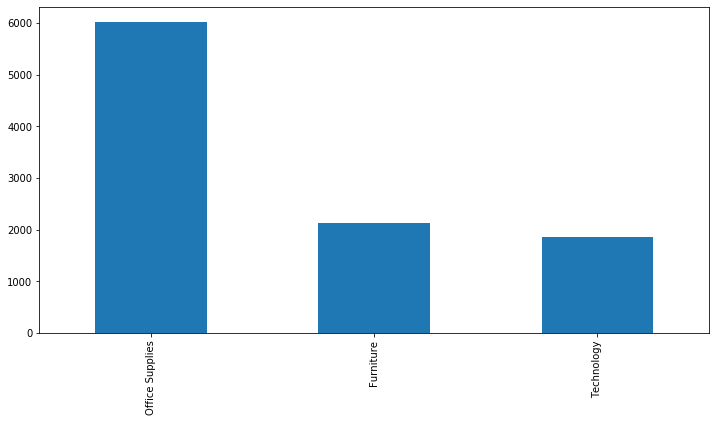

In [26]:
plt.figure(figsize=(12,6))
df.Category.value_counts().plot(kind='bar')

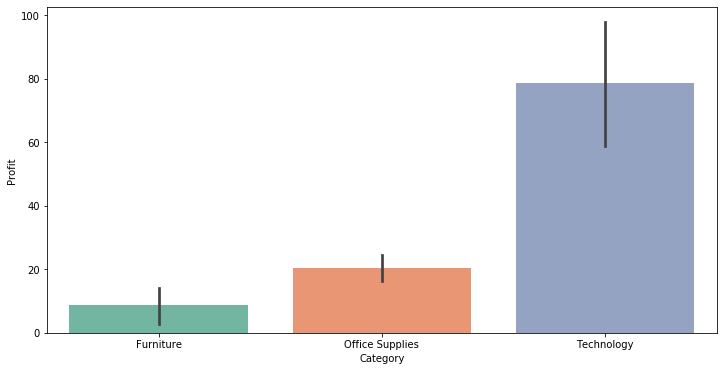

In [27]:
plt.figure(figsize=(12,6))
ax= sns.barplot(x="Category", y="Profit", data=df, palette="Set2")

## Conclusion

### Technology is the Highest selling category and Furniture is the lowest selling category
#### Highest quantity of item sold is of category Office Supplies followed by furniture and Technology


## Sub- Category Analysis

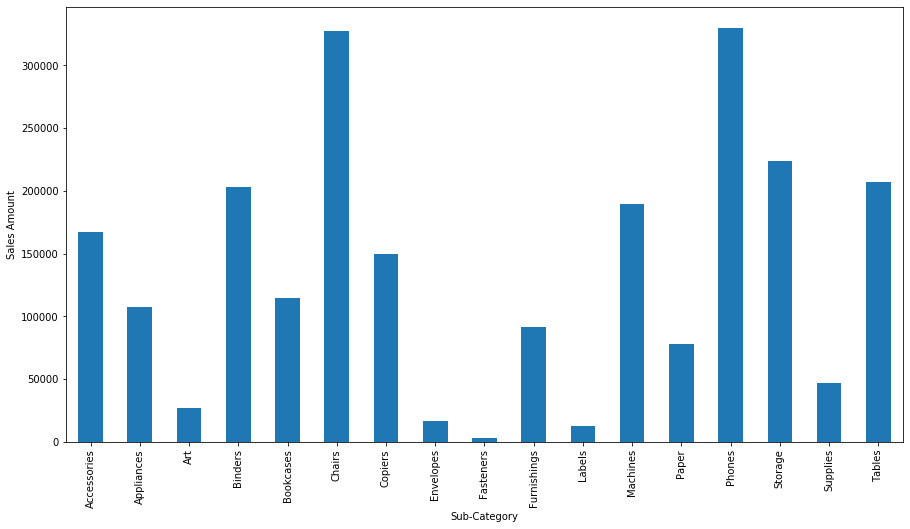

In [28]:
plt.figure(figsize=(15,8))
df.groupby('Sub-Category').Sales.sum().plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

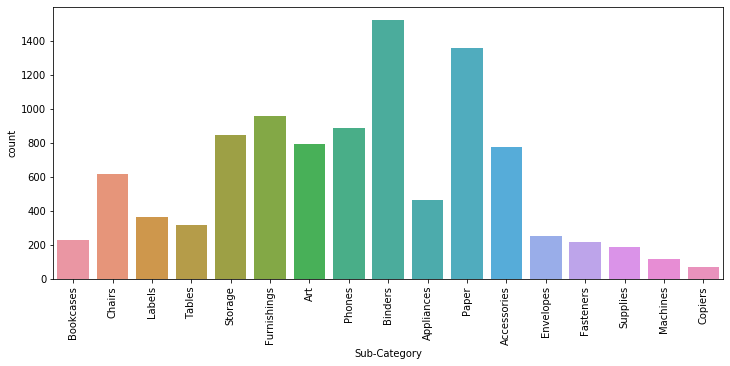

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(df["Sub-Category"])
plt.xticks(rotation= 90)
plt.show()

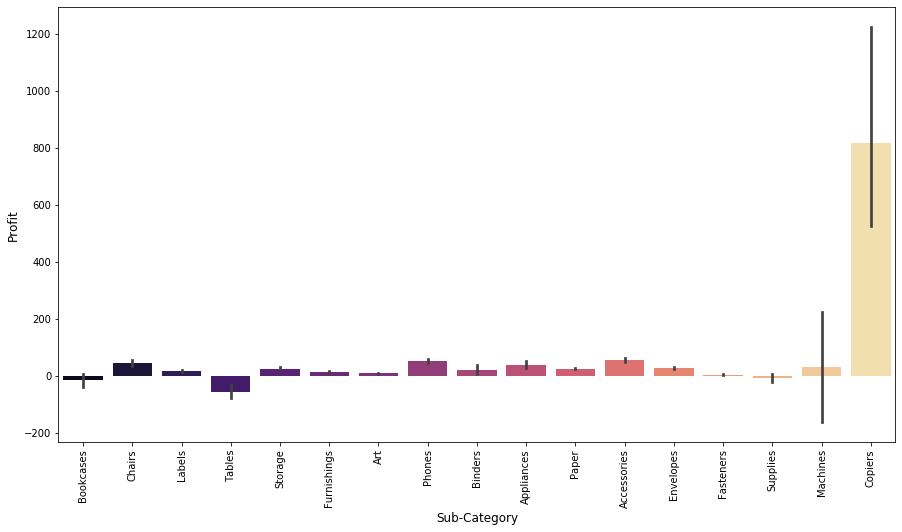

In [30]:
plt.figure(figsize=[15,8])
ax= sns.barplot(x="Sub-Category", y="Profit", data=df, palette='magma')
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation= 90)
plt.show()

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003
5,Chairs,26567.1278
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13052.7230
7,Envelopes,6964.1767


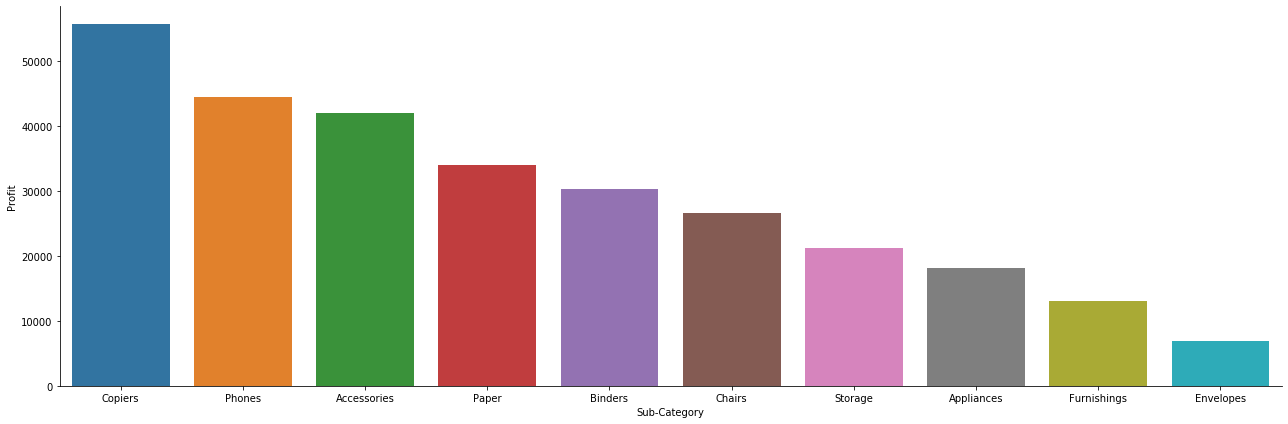

In [69]:
sns.catplot(x='Sub-Category',y='Profit',data=top_sub_categories.head(10),kind='bar',height=6,aspect=3)
top_sub_categories

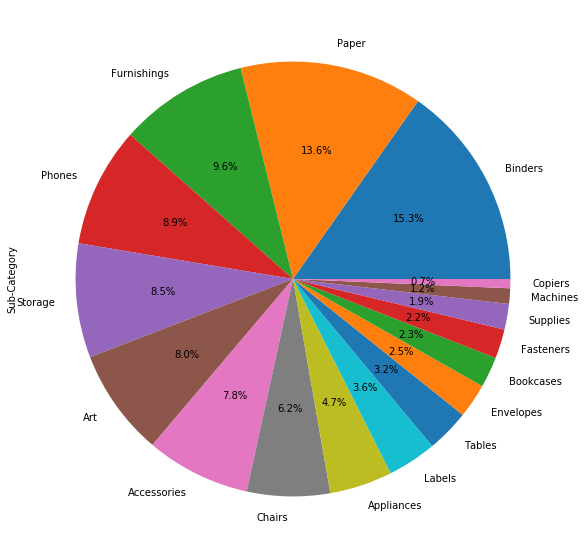

In [31]:
# Pie Plot in Sub Category
plt.figure(figsize=(14,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [32]:
# Top profitable sub-category
top_sub_categories=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_sub_categories

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003
5,Chairs,26567.1278
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13052.7230
7,Envelopes,6964.1767


## Conclusion

##### Highest Sub-Category in terms of sales amount are Chairs and Phones and lowest are fastners and labels
##### Highst Sub-Category in terms of Quantity sold are Binders, papers and lowest are Copier & Machines

### Copiers is generating most profit

## Segment Analysis

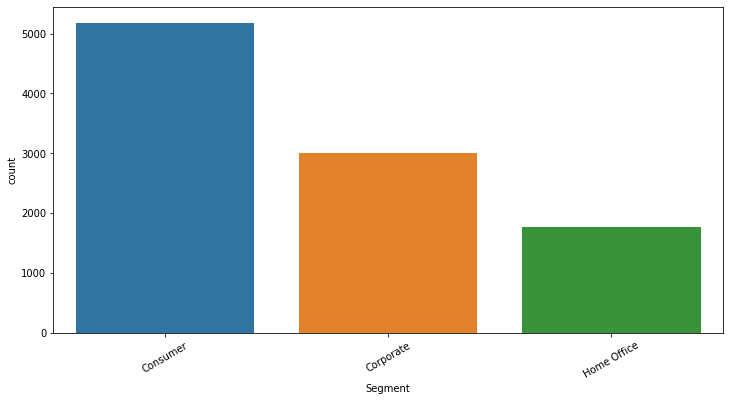

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(df['Segment'])
plt.xticks(rotation=30)
plt.show()

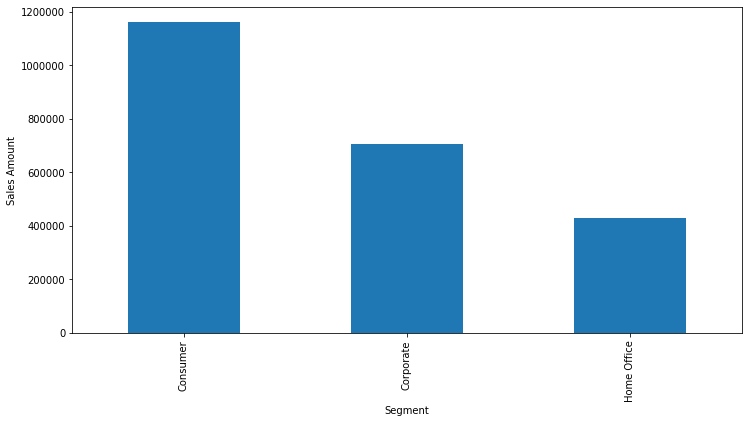

In [34]:
plt.figure(figsize=(12,6))
df.groupby('Segment').Sales.sum().plot(kind='bar')
plt.ylabel("Sales Amount")
plt.show()

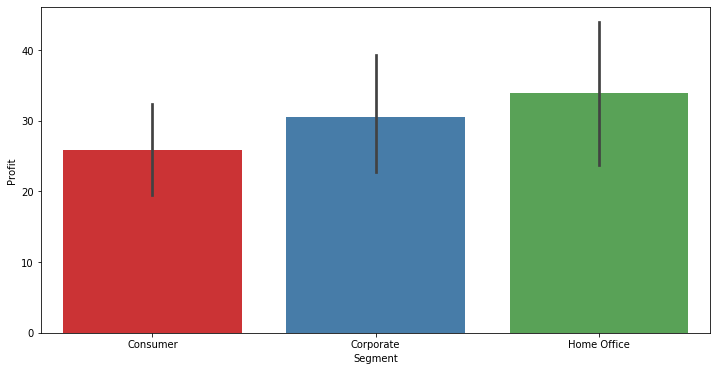

In [35]:
plt.figure(figsize=(12,6))
ax= sns.barplot(x='Segment', y='Profit', data=df, palette='Set1')

## Conclusion

#### Segment Consumer is leading in number of sales as well as sales amount
#### Home Office is the most profitable in all 3

## Shipping Mode

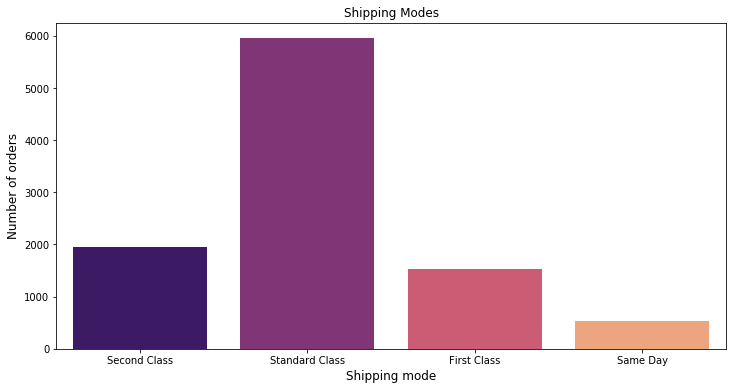

In [36]:
plt.figure(figsize=(12,6))
sns.countplot('Ship Mode', data=df, palette='magma')
plt.title('Shipping Modes', size=12)
plt.xlabel('Shipping mode', size=12)
plt.ylabel('Number of orders', size=12)
plt.show()

## Conclusion

#### The Standard shipping count has the most count which shows cost of standard shipping delivery is less compared to others
#### Customer has preferred the Standard Class while buying something

## Region Wise Analysis

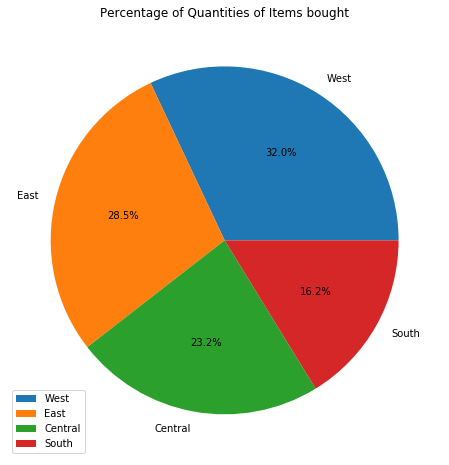

In [37]:
plt.figure(figsize=(10,8))
plt.pie(df['Region'].value_counts(),labels=list(df['Region'].value_counts().index),autopct='%1.1f%%')
plt.title('Percentage of Quantities of Items bought')
plt.legend()
plt.show()

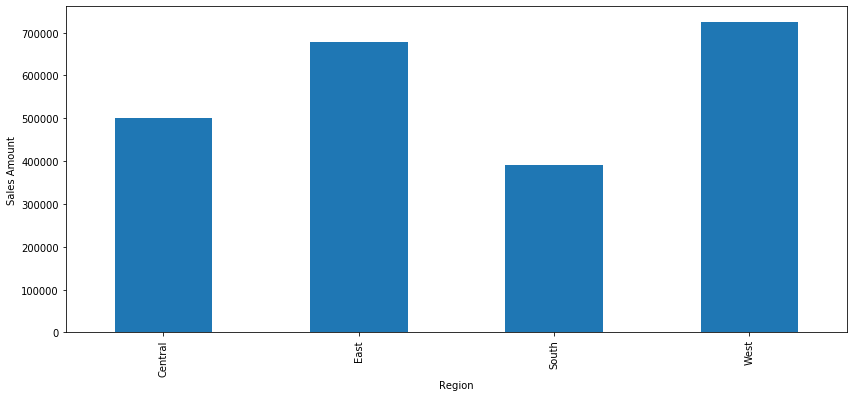

In [38]:
plt.figure(figsize=(14,6))
d=df.groupby('Region').Sales.sum().plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

## Conclusion

#### West region is leading in terms of amount of sale followed by East, Central, South

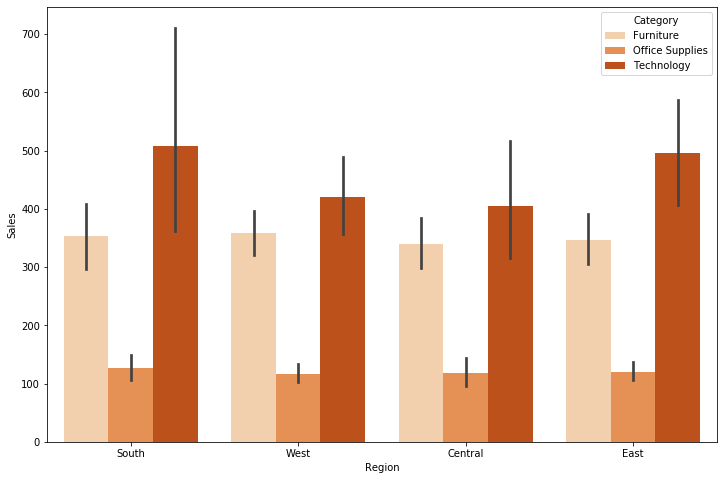

In [39]:
# Barplot representation for better understanding
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=df, palette="Oranges")

## Conclusion

#### In each region office supply is worst performing & Technology is best performing

## State Wise Analysis of Sales & Profit

In [40]:
group= df.groupby('State')
group

In [41]:
sales_agg=group['Sales'].sum().sort_values(ascending=False)
sales_agg.head()

State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Name: Sales, dtype: float64

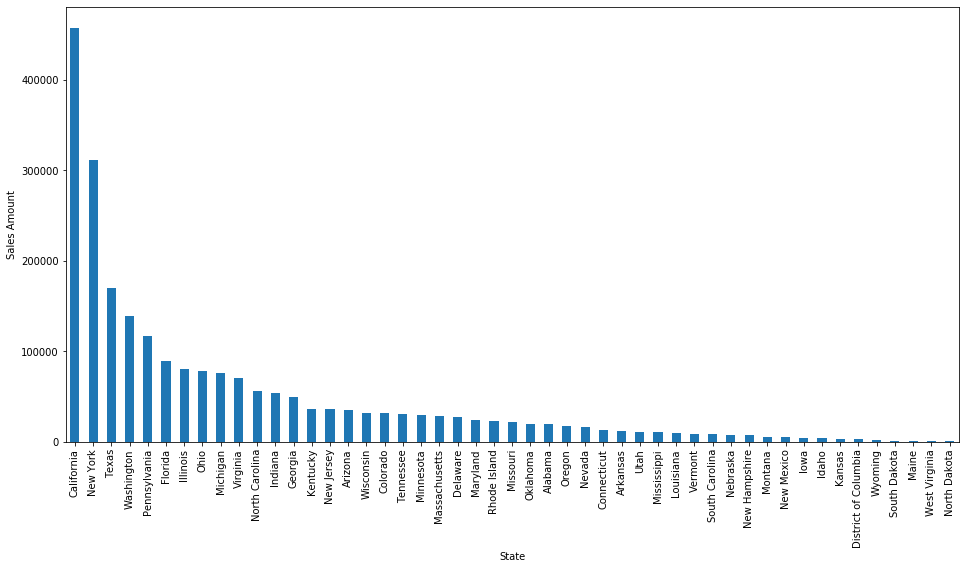

In [43]:
plt.figure(figsize=(16,8))
sales_agg.plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()


## Conclusion

#### California is leading in terms of Sales Amount followed by New York and others

In [44]:
# Profit analysis State Wise

Profit_agg=group['Profit'].sum().sort_values(ascending=False)
Profit_agg.head()

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Name: Profit, dtype: float64

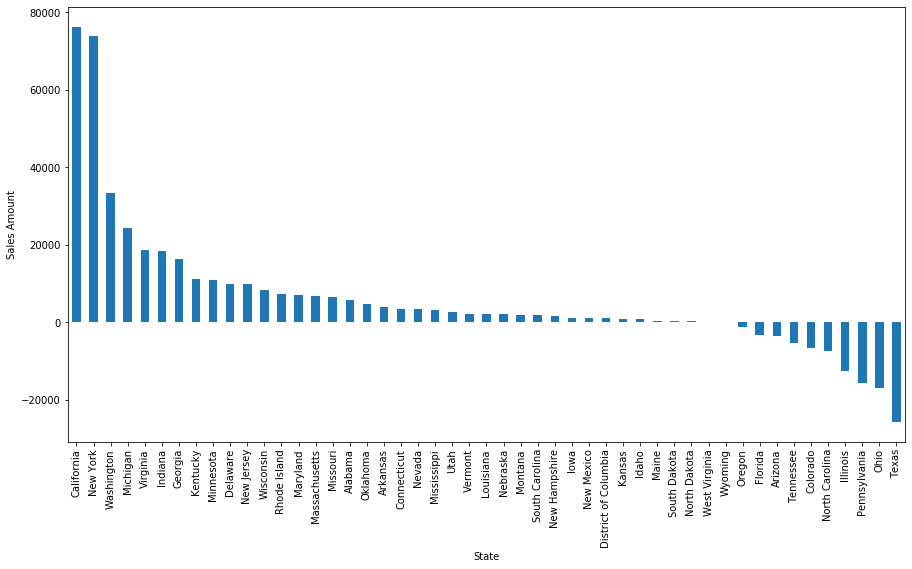

In [45]:
plt.figure(figsize=(15,8))
Profit_agg.plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

## Conslusion

#### California is generating the highest amount of profit and Texas is in huge loss

In [46]:
# Discount Analysis State Wise

Discount_agg=group['Discount'].sum().sort_values(ascending=False)
Discount_agg.head()

State
Texas           364.24
Pennsylvania    192.70
Illinois        191.10
Ohio            152.10
California      145.60
Name: Discount, dtype: float64

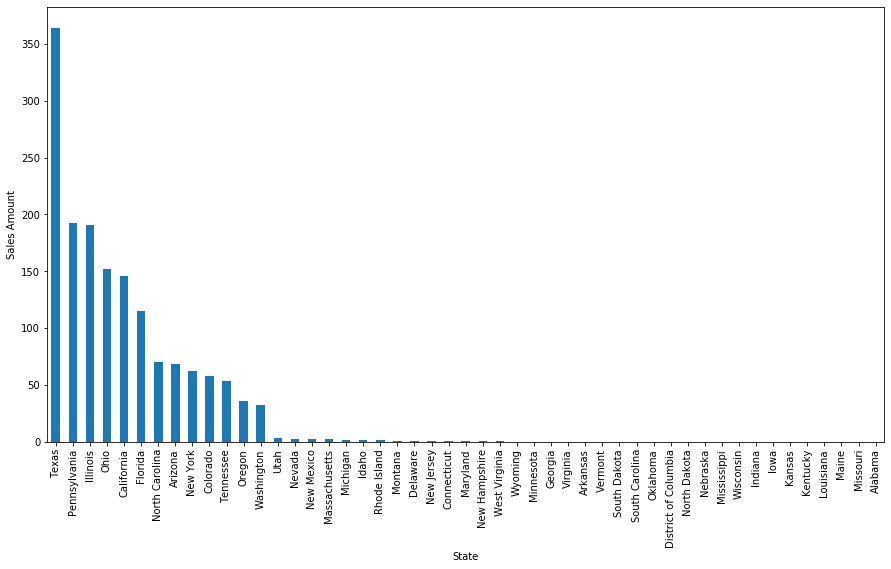

In [47]:
plt.figure(figsize=(15,8))
Discount_agg.plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

## Conclusion

#### Texas gives the maximum discount followed by Pennsylvania and others
#### Alabama gives the lowest discount rates

In [48]:

avg_sales=group['Sales'].mean().sort_values(ascending=False)
avg_sales.head()

State
Wyoming         1603.136000
Vermont          811.760909
Nevada           428.951333
Rhode Island     404.070643
Montana          372.623467
Name: Sales, dtype: float64

In [49]:

avg_profit=group['Profit'].mean().sort_values(ascending=False)
avg_profit.head()

State
Vermont         204.088936
Rhode Island    130.100523
Indiana         123.375411
Montana         122.221900
Minnesota       121.608847
Name: Profit, dtype: float64

In [50]:
avg_discount=group['Discount'].mean().sort_values(ascending=False)
avg_discount.head()


State
Illinois        0.389206
Texas           0.370539
Pennsylvania    0.328840
Ohio            0.325000
Colorado        0.316484
Name: Discount, dtype: float64

## Conclusion

#### Important thing: States with higher average sales, average prfit and average discount are different from their aggregated counter parts

## City Wise Analysis of Profit

In [59]:
# Top profitable cities
top_cities=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_cities.head(10)

,City,Profit
329,New York City,62013.8973
266,Los Angeles,30431.4267
452,Seattle,29121.6825
438,San Francisco,17466.1186
123,Detroit,13146.6935
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


### These are the top 10 profit generating cities

In [60]:
# Comparing Sales, Discount and Profit of Cities
df1_sum = df.groupby(['City'])[['Sales', 'Discount','Profit']].sum()
df1_sum['No of Purchase'] = df['City'].value_counts().to_frame()
df1_sum.head()

,Sales,Discount,Profit,No of Purchase
City,,,,
Aberdeen,25.500,0.0,6.6300,1
Abilene,1.392,0.8,-3.7584,1
Akron,2729.986,7.5,-186.6356,21
Albuquerque,2220.160,0.8,634.0881,14
Alexandria,5519.570,0.0,318.6183,16


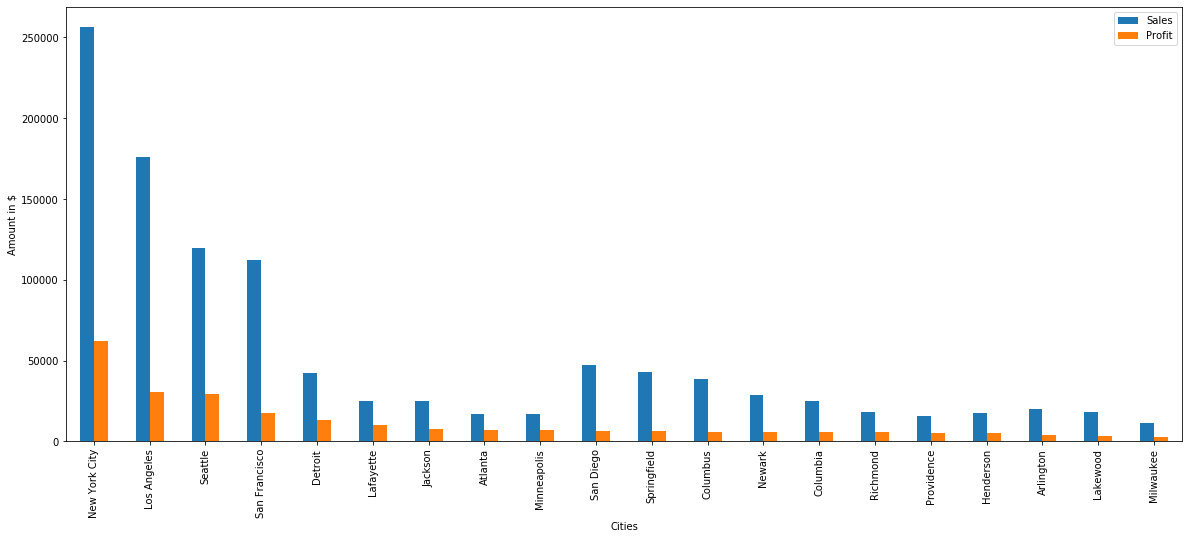

In [61]:
# Sorted on basis of Profit.
df1_sum.sort_values('Profit',ascending=False).head(20)[['Sales','Profit']].plot(kind='bar',figsize= (20,8),label=['Avg Sales Price($)','Profit($)'])
plt.ylabel('Amount in $')
plt.xlabel('Cities')
plt.legend()
plt.show()

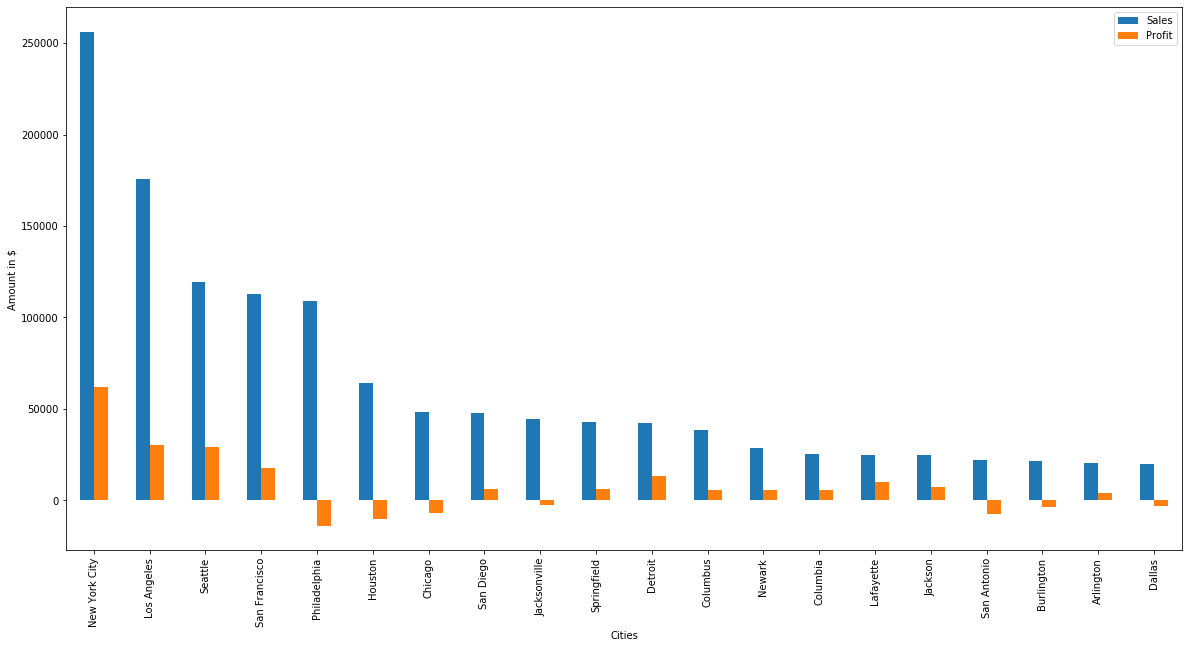

In [62]:
# Sorted on basis of Sales.
df1_sum.sort_values('Sales',ascending=False).head(20)[['Sales','Profit']].plot(kind='bar',figsize= (20,10),label=['Avg Sales Price($)','Profit($)'])
plt.ylabel('Amount in $')
plt.xlabel('Cities')
plt.legend()
plt.show()

## Conclusion

#### New York City is leading in terms of Sale and profit followed by Los Angeles ,Seattle & others

## City Wise Discount

In [70]:
df1_mean = df.groupby(['City'])[['Sales', 'Discount','Profit']].mean()

df1_mean.sort_values('Discount',ascending=False).head(10)

,Sales,Discount,Profit
City,,,
Abilene,1.3920,0.800000,-3.75840
Deer Park,6.9240,0.800000,-10.38600
Romeoville,8.9520,0.800000,-14.77080
Missouri City,6.3700,0.800000,-9.55500
Elyria,1.8240,0.700000,-1.39840
Pensacola,2.2140,0.700000,-1.47600
Ormond Beach,2.8080,0.700000,-1.96560
Littleton,72.2940,0.700000,-98.80180
Tyler,69.4412,0.640000,-88.74172


In [71]:
df1_sum.sort_values('Discount',ascending=True).head(10)

,Sales,Discount,Profit,No of Purchase
City,,,,
Aberdeen,25.50,0.0,6.6300,1
Edmond,959.55,0.0,243.1039,2
Manhattan,273.96,0.0,10.9584,1
Manchester,2126.28,0.0,600.5054,11
Elkhart,171.43,0.0,16.6721,2
Malden,228.38,0.0,31.1692,3
Madison,5346.79,0.0,1123.6552,10
Macon,364.01,0.0,144.8535,6
Lowell,4837.93,0.0,1312.5717,16


## Conclusion

#### City of Abilene, Deer Park, Romeoville are giving the maximum discount and still they are in huge loss.

## Final Conclusion

### Cities like New York , Loss Angeles and Seattle are doing best in terms of sales & Profit.

### Technology is best performing category despite selling less number of items.

### In some Cities despite company is giving huge discounts the company is incurring Losses and there are some cities where no discount is Given, still Company is earning huge Profits. So, work is need to be done to improve the profits and Discount Policy needs to be reviewed.